# Causal Estimation Using Bayesian Network

In this notebook, it will be considered if there are relationships between 'heart.csv' dataset variables. 


### Import libraries

In [ ]:
!pip install pgmpy==0.1.9

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image

from pgmpy.estimators import ConstraintBasedEstimator
from pgmpy.models import BayesianModel

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data processing

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
sns.set()

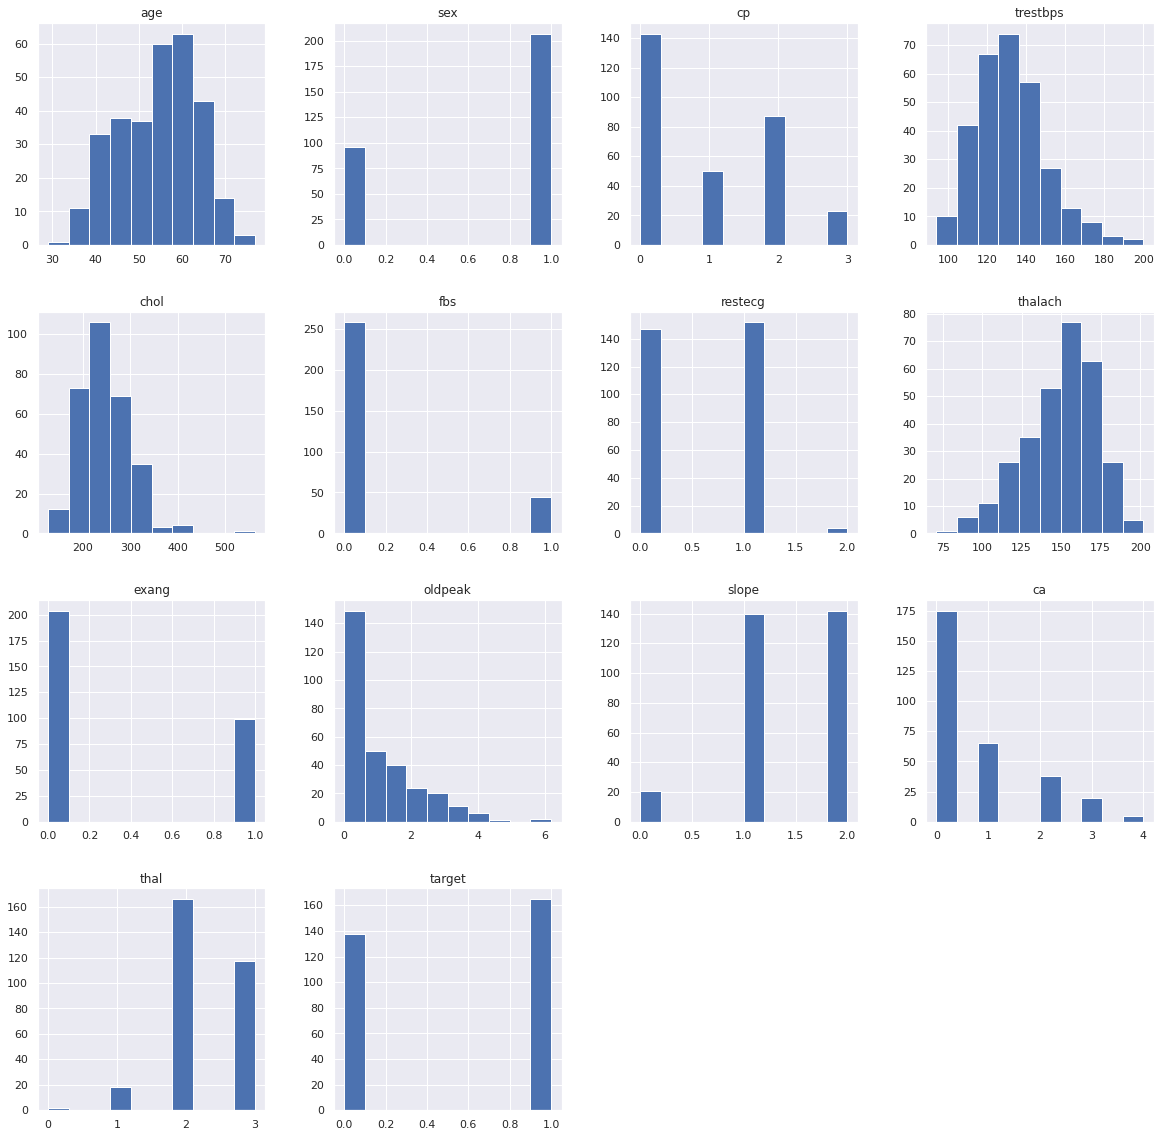

In [ ]:
df.hist(figsize=(20, 20));

In [ ]:
# Transform continuous variables into discrete variables
df['age'] = pd.cut(df['age'], 5)
df['trestbps'] = pd.cut(df['trestbps'], 5)
df['chol'] = pd.cut(df['chol'], 5)
df['thalach'] = pd.cut(df['thalach'], 5)
df['oldpeak'] = pd.cut(df['oldpeak'], 5)

### Modeling and Causal Estimation

In [ ]:
est = ConstraintBasedEstimator(df)

# Undirected graph
skel, seperating_sets = est.estimate_skeleton(significance_level=0.05)
print("Undirected edges: ", skel.edges())

# Partial directed acyclic graph
pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG edges:       ", pdag.edges())

# Directed acyclic graph
model = est.pdag_to_dag(pdag)
print("DAG edges:        ", model.edges())

### The results below show the graph connections. 
### PDAG and DAG is directed from the left variable to the right variable

/usr/local/lib/python3.7/dist-packages/pgmpy/estimators/CITests.py:89: UserWarning: Insufficient data for testing age _|_ trestbps | ['thalach']. At least 400 samples recommended, 303 present.
  5 * num_params, len(data)
/usr/local/lib/python3.7/dist-packages/pgmpy/estimators/CITests.py:89: UserWarning: Insufficient data for testing thalach _|_ oldpeak | ['thal']. At least 320 samples recommended, 303 present.
  5 * num_params, len(data)


Undirected edges:  [('age', 'ca'), ('cp', 'exang'), ('oldpeak', 'slope'), ('ca', 'target'), ('thal', 'target')]
PDAG edges:        [('age', 'ca'), ('cp', 'exang'), ('exang', 'cp'), ('oldpeak', 'slope'), ('slope', 'oldpeak'), ('ca', 'age'), ('ca', 'target'), ('thal', 'target')]
DAG edges:         [('exang', 'cp'), ('slope', 'oldpeak'), ('ca', 'target'), ('ca', 'age'), ('thal', 'target')]


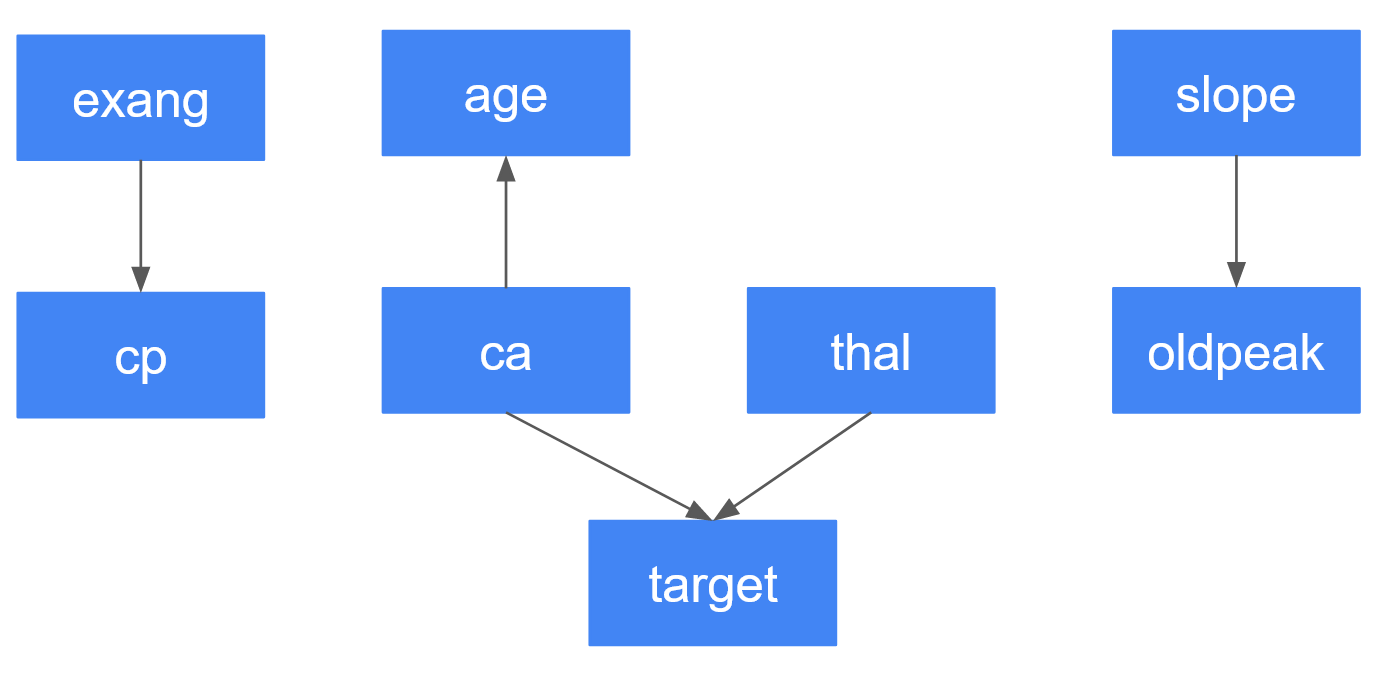

In [ ]:
Image('dag.PNG')

### Conclusion

Only 'ca' and 'thal' directed to 'target'. 'ca' is number of major vessels (0-3) colored by fluoroscopy. 'thal' means thalassemia which is a symptom related to your blood. Therefore, it seems that those two variables could have a causal connection to 'target'. The important variables to predict 'target' might be 'ca' and 'thal'.

'cp' and 'exang' are related to a chest pain and 'oldpeak' and 'slope' are related to ecg data with your exercise, but interestingly they do not connected to 'target'. 'cp' is induced by many different reasons such as muscle problems, lung problems, or heart problems. That is why it might be difficult to distinguish if the chance of heart attack is high. The reason that 'oldpeak' did not direct to 'target' might be the same reasons.

One relationship ('ca' -> 'age') seems it is a wrong causal connection. Generally speaking, 'ca' does not increase your age. It is assumed that when 'age' increases, 'ca' could also increase instead. Therefore, it could considered that 'ca' and 'age' have an undirected connection ('ca' - 'age').

The bayesian network is helpful to visualize the causality but it might fail sometimes. It might also be useful to discover new causality.